### 4.10 Part5 YHS
#### 1 Importing libraries and df w/o PI
#### 2 analyzing Young High Spender by Loyalty Flag
#### 3 -analyzing Young High Spender purshease by  sales amount
#### 4 -analyzing Young High Spender by Busiest_day
#### Analyzing by prefered hour of day
#### 6 Analyzing number of Young High Spender by State
#### 7 Analyzing Young High Spenders  by n_dependants
#### 8 Days since prior order
####  9  Defining TOP products for client group


### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

#### -importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','YHS.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(202625, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'median_days_sinse_ord','order_number','mean_price']] .describe()

,user_id,Age,income,product_id,median_days_sinse_ord,order_number,mean_price
count,202625.000000,202625.000000,202625.000000,202625.000000,202625.000000,202625.000000,202625.000000
mean,109277.614095,28.786922,162330.702366,25027.011746,9.198885,18.698147,231.109586
std,57582.310892,6.605939,85599.494376,14352.197856,6.237597,18.447751,590.114700
min,17.000000,18.000000,42266.000000,0.000000,0.000000,1.000000,10.001923
25%,63612.000000,23.000000,97374.000000,12919.000000,5.000000,5.000000,28.845897
50%,111683.000000,29.000000,149785.000000,24852.000000,7.000000,12.000000,82.132226
75%,157980.000000,35.000000,185263.000000,37354.000000,11.000000,26.000000,190.033439
max,206049.000000,40.000000,397929.000000,49688.000000,30.000000,100.000000,10209.987755


### 2 Analyzing Young High Spender by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','Gender','fam_status','STATE','department_id', 'product_id', 'product_name', 
       'busiest_day','loyalty_flag','AgeIncome_flag','prices','income']]

### - How many customers are YHS?

In [8]:
df1[['user_id']].drop_duplicates().shape

(1256, 1)

### 3 -Analyzing Young High Spender by Loyalty Flag and Family Status

#### -creating subset with unique user_id

In [9]:
df1=df[['user_id','fam_status','loyalty_flag']].drop_duplicates()

In [10]:
df1.groupby('fam_status')['loyalty_flag'].value_counts()

fam_status                        loyalty_flag    
living with parents and siblings  Regular customer     78
                                  New customer         71
                                  Loyal customer       21
married                           Regular customer    372
                                  New customer        323
                                  Loyal customer       82
single                            New customer        145
                                  Regular customer    135
                                  Loyal customer       29
Name: loyalty_flag, dtype: int64

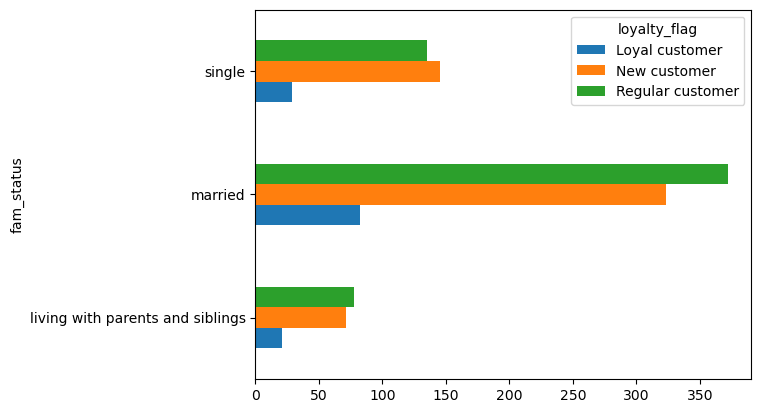

In [11]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_LoyaltyFlag.png'))

### 3 -analyzing Young High Spender purshease by  sales amount

In [13]:
Df1=df[['user_id','prices','loyalty_flag']]

In [14]:
Df1

,user_id,prices,loyalty_flag
7894,100958,1.7,New customer
7895,100958,7.2,New customer
7896,100958,1.1,New customer
7897,100958,8.2,New customer
7898,100958,9.8,New customer
...,...,...,...
10907307,121722,12.9,New customer
10907316,37545,11.0,New customer
10907317,37545,11.0,New customer
10907318,37545,11.0,New customer


In [15]:
df11=Df1.groupby('loyalty_flag')['prices'].sum()

In [16]:
df11

loyalty_flag
Loyal customer      10834065.6
New customer         8525009.9
Regular customer    27194152.8
Name: prices, dtype: float64

#### -creating and saving plot

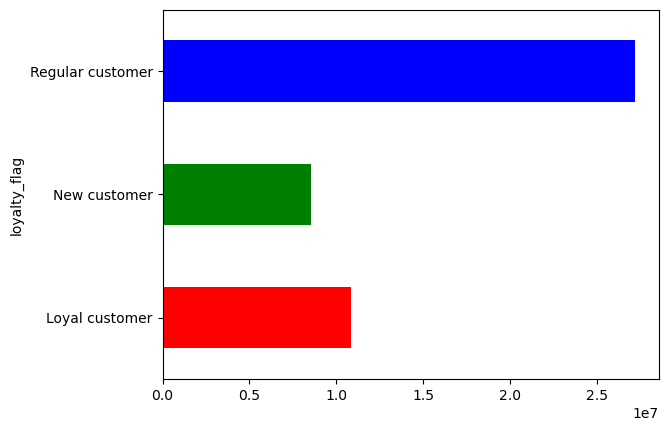

In [17]:
bar22=Df1.groupby('loyalty_flag')['prices'].sum().plot.barh(color=['red', 'green','blue'])

In [18]:
bar22.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_LoyaltyFlagPrices.png'))

### 4 -analyzing Young High Spender by Busiest_day

In [19]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [20]:
df4

,user_id,STATE,busiest_day,day_of_week
7894,100958,North Dakota,Busiest days,0
7895,100958,North Dakota,Busiest days,0
7896,100958,North Dakota,Busiest days,0
7897,100958,North Dakota,Busiest days,0
7898,100958,North Dakota,Busiest days,0
...,...,...,...,...
10907307,121722,Minnesota,Regularly days,6
10907316,37545,District of Columbia,Regularly days,2
10907317,37545,District of Columbia,Busiest days,0
10907318,37545,District of Columbia,Slowest days,3


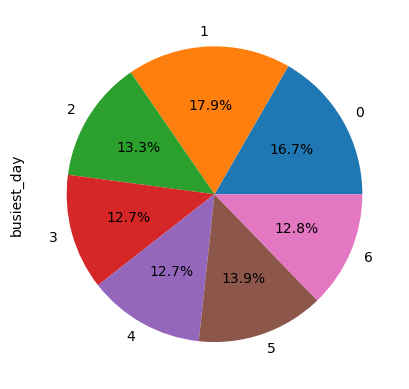

In [21]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [22]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_BusiestDayOfWeek.png'))

In [23]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    33801
1    36289
2    26962
3    25660
4    25823
5    28232
6    25858
Name: busiest_day, dtype: int64

### 5 Analyzing by prefered hour of day

In [24]:
df44=df[['order_hour_of_day','user_id']]

In [25]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      1417
1       657
2       450
3       324
4       346
5       601
6      1532
7      5548
8     10697
9     14672
10    18928
11    18016
12    16417
13    15934
14    17338
15    16626
16    16702
17    13792
18     9991
19     7510
20     6110
21     3716
22     3304
23     1997
Name: user_id, dtype: int64

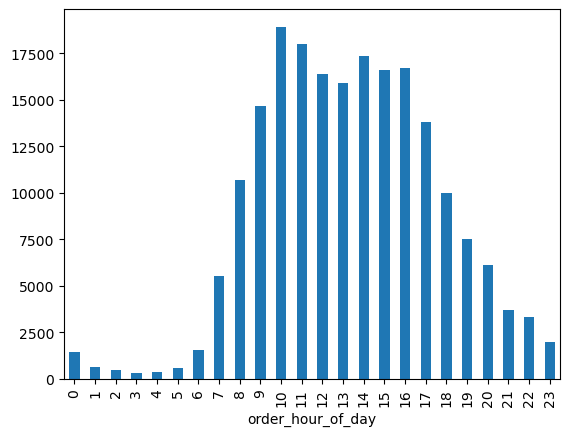

In [26]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [27]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_BusiestHourOfDay.png'))

### 6 Analyzing number of Young High Spender by State

In [28]:
df5=df[['user_id','STATE']]

In [29]:
DF5=df5.drop_duplicates().reset_index()

In [30]:
DF5

,index,user_id,STATE
0,7894,100958,North Dakota
1,12844,31668,Washington
2,14327,58136,Virginia
3,24408,164144,New Mexico
4,37454,15683,New Mexico
...,...,...,...
1251,10870170,43200,Arizona
1252,10888799,4259,New Mexico
1253,10892729,7099,Florida
1254,10902198,86902,West Virginia


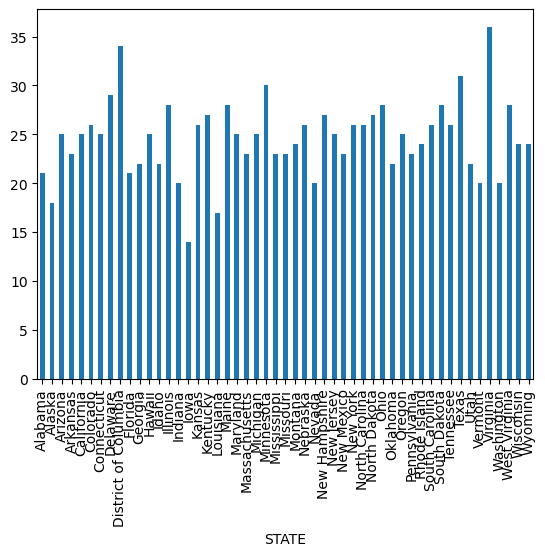

In [31]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [32]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 21
Alaska                  18
Arizona                 25
Arkansas                23
California              25
Colorado                26
Connecticut             25
Delaware                29
District of Columbia    34
Florida                 21
Georgia                 22
Hawaii                  25
Idaho                   22
Illinois                28
Indiana                 20
Iowa                    14
Kansas                  26
Kentucky                27
Louisiana               17
Maine                   28
Maryland                25
Massachusetts           23
Michigan                25
Minnesota               30
Mississippi             23
Missouri                23
Montana                 24
Nebraska                26
Nevada                  20
New Hampshire           27
New Jersey              25
New Mexico              23
New York                26
North Carolina          26
North Dakota            27
Ohio                    28
Oklahoma              

In [33]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_UsersNumberState.png'))

### 7 Analyzing Young High Spenders  by n_dependants

In [34]:
df6=df[['user_id', 'n_dependants']]

In [35]:
DF6=df6.drop_duplicates()

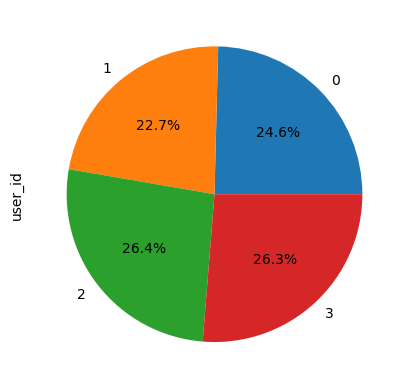

In [36]:
pie16=df6.groupby(['n_dependants'])['user_id'].nunique().plot(kind='pie', autopct='%0.01f%%')

In [37]:
df6

,user_id,n_dependants
7894,100958,2
7895,100958,2
7896,100958,2
7897,100958,2
7898,100958,2
...,...,...
10907307,121722,2
10907316,37545,2
10907317,37545,2
10907318,37545,2


In [38]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_NDependansUsers.png'))

In [39]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    309
1    285
2    332
3    330
Name: user_id, dtype: int64

### 8 Days since prior order

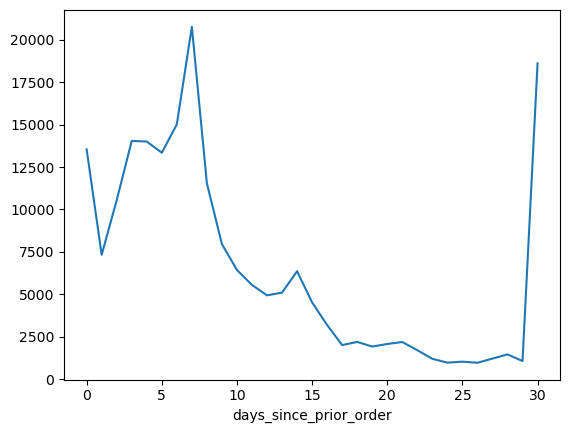

In [40]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [41]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     13539
1      7323
2     10543
3     14036
4     14000
5     13342
6     15013
7     20765
8     11538
9      7955
10     6428
11     5546
12     4933
13     5095
14     6355
15     4517
16     3182
17     1999
18     2189
19     1914
20     2066
21     2182
22     1701
23     1191
24      966
25     1024
26      958
27     1206
28     1451
29     1060
30    18608
Name: days_since_prior_order, dtype: int64

In [42]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_DaysSincePriorOrder.png'))

### 9  Defining TOP products for client group


 #### creating subset

In [43]:
df18=df[['product_name','product_id','prices']]

In [44]:
df18

,product_name,product_id,prices
7894,Traditional Chicken & Orzo with Lemon Soup,129,1.7
7895,Sesame Flatbreads,12002,7.2
7896,Natural Apple Sauce Cups,15860,1.1
7897,Light Mozzarella String Cheese,22882,8.2
7898,Eggo Nutri-Grain Low Fat Waffles,26510,9.8
...,...,...,...
10907307,Kiwi Sandia Sparkling Water,12576,12.9
10907316,Smartwater,21386,11.0
10907317,Smartwater,21386,11.0
10907318,Smartwater,21386,11.0


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [45]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=2).head(10)

In [46]:
DF18

,product_name,prices
0,Banana,3116
1,Bag of Organic Bananas,1657
3,,1401
4,2% Reduced Fat Milk,803
5,Blueberries,776
6,Roma Tomato,720
7,Organic Whole Milk,679
8,Small Hass Avocado,648
9,Fresh CA Grown Eggs,645
10,100% Whole Wheat Bread,635


In [47]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [48]:
DF18

,product_name,count_orders
0,Banana,3116
1,Bag of Organic Bananas,1657
3,,1401
4,2% Reduced Fat Milk,803
5,Blueberries,776
6,Roma Tomato,720
7,Organic Whole Milk,679
8,Small Hass Avocado,648
9,Fresh CA Grown Eggs,645
10,100% Whole Wheat Bread,635


#### -creating plot

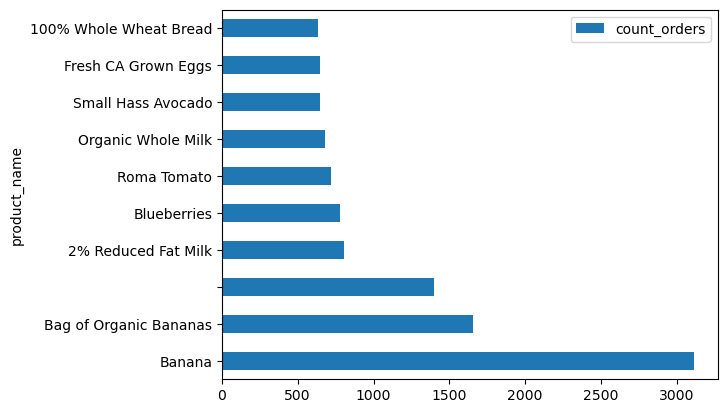

In [49]:
Bar21=DF18.plot.barh(x='product_name')

In [50]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YHS_Products.png'))

#### droping duplicates

In [51]:
df19=df18.drop_duplicates()

In [52]:
df19

,product_name,product_id,prices
7894,Traditional Chicken & Orzo with Lemon Soup,129,1.7
7895,Sesame Flatbreads,12002,7.2
7896,Natural Apple Sauce Cups,15860,1.1
7897,Light Mozzarella String Cheese,22882,8.2
7898,Eggo Nutri-Grain Low Fat Waffles,26510,9.8
...,...,...,...
10902321,Organic Sweet Potatoes,13730,10.8
10904063,Lavender Lemonade,38809,7.0
10904235,Classic Ketchup,39799,6.7
10904727,Lime Italian Sparkling Mineral Water,36216,3.0


#### sorting by descending order to see YHS TOP products

In [53]:
df19.loc[df19['prices']>=1000].sort_values(by='prices', ascending=False).head(10)

,product_name,product_id,prices
302065,2 % Reduced Fat Milk,33664,99999.0
7926,Lowfat 2% Milkfat Cottage Cheese,21553,14900.0
